# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')

In [39]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [40]:
df_mean = np.mean(df.temperature)
df_std = np.std(df.temperature)
temperature = df.temperature

### 1.) Is the distribution of body temperatures normal?

In [41]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

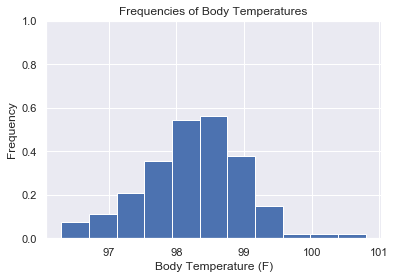

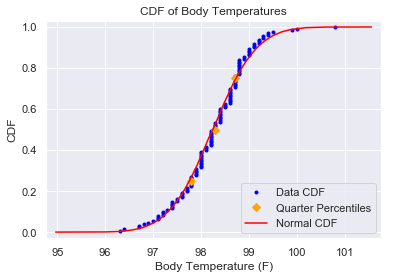

the total number of people with a temperature of 98.6 is 10 , all other temperatures 120 .


In [112]:
success_total = np.sum(temperature == 98.6)

sns.set()
x_temp, y_temp = ecdf(temperature)
norm_dist = np.random.normal(df_mean, df_std, 10000)
norm_x, norm_y = ecdf(norm_dist)

_ = plt.hist(df.temperature, bins = 11, density = True)

_ = plt.xlabel('Body Temperature (F)')
_ = plt.ylabel('Frequency')
_ = plt.title('Frequencies of Body Temperatures')
_ = plt.ylim((0,1))

plt.show()

percentile = np.array([25,50,75])
_ = plt.plot(x_temp, y_temp, marker = '.', linestyle = 'none', color = 'blue', label = 'Data CDF')
_ = plt.margins(0.03)

ptiles_temp = np.percentile(temperature, percentile)
_ = plt.plot(ptiles_temp, percentile/100, marker = 'D', color = 'orange', linestyle = 'none', 
           label = 'Quarter Percentiles')
_ = plt.plot(norm_x, norm_y, color = 'red', label = 'Normal CDF')
_ = plt.xlabel('Body Temperature (F)')
_ = plt.ylabel('CDF')
_ = plt.title('CDF of Body Temperatures')
_ = plt.legend(loc = 'lower right')

plt.show()

print('the total number of people with a temperature of 98.6 is', success_total, ', all other temperatures', 
      130 - success_total, '.')

#### Answer 1:
From the historgram the data appears to fit the normal distribution histogram. The number of successes and failures are each >= 10, which fit requirements of a normal distribution and central limit theorem. 

Using a normal CDF curve with the same mean and standard deviation we can see that the distributions seem to fit one another. Therefore the temperature distribution is normal according to the second graph. 

### 2.) Is the sample size large? Are the observations independent?

#### Answer 2:
Assuming each observation is taken from a different individual per entry, then the observations are independent. 

The sample size of 130 is less than 10% of the parent population therefore we can assume independence. 

The sample size of 130 > 30, which is reasonably large to satisfy the centeral limit theorem. 

### 3.) Is the true population mean really 98.6F?

In [43]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [121]:
#Shift temperature data to have a mean of 98.6 for hypothesis testing. 

shifted_temps = df.temperature - np.mean(temperature) + 98.6
bs_reps_temp = draw_bs_reps(shifted_temps, np.mean, size = 10000)
p = np.sum(bs_reps_temp <= true_mean_temperature) / len(bs_reps_temp)
print('p =', p)


p = 0.0


In [94]:
#Frequentist t-stat 
t_stat = (np.mean(temperature) - 98.6) / (np.std(temperature)/np.sqrt(130))
print('t =', t_stat)

#Frequentist approach z score
true_mean_temperature = np.mean(temperature)
z_score = (true_mean_temperature - 98.6) / (np.std(temperature) / np.sqrt(130))
print('z =', z_score)


t = -5.4759252020785585
z = -5.4759252020785585


#### Answer 3:
- H<sub>0</sub>: There is no significance difference between the sample mean 98.249 F and the population mean of 98.6 F. 
- H<sub>A</sub>: There is a significance difference between the sample mean 98.249 F and the population mean of 98.6 F.

After creating a bootstrap replicate of 10,000 trials, the probability achieving a sample mean of 98.6F is p = 0.0. Therefore, we reject the null hypothesis and find that there is a significance difference between the our sample mean and the proposed population mean of 98.6F. 

For our data you would want a one sample test since we are comparing our sample group to the population mean of 98.6 F. It would be appropriate to use the t test because the population standard deviation is unknown. Using the frequentist approach, both our t-test and z-score is -5.48 with a probability < 0.05. Therefore, using frequentist stats we would reject the null hypothesis. 

Both the t-test and z-test yielded the same results of rejecting the null hypothesis. The two stats are equal because the population standard deviation was unknown for the z test, and the sample mean was used as an estimate for standard deviation. Using a sample mean to calculate the z test is the formula for the t test, therefore yielding the same results. 


### 4.) Draw a small sample size of 10 from the data and rerun 

In [124]:
#Grab random 10 samples from data
np.random.seed(100)
sample_10 = np.random.choice(df.temperature, size=10)

#Bootstrap: alpha = 0.05
sample_10_shifted = sample_10 - np.mean(sample_10) + 98.6
bootstrap_10 = draw_bs_reps(sample_10_shifted, np.mean, size = 10000)
p = np.sum(bootstrap_10 <= np.mean(sample_10)) / len(bootstrap_10)
print('p =', p)

#Frequentist: Calculate t-stat df = 9, alpha = 0.05
std_sample_10 = np.std(sample_10)
t_stat_10 = (mean_sample_10 - 98.6) / (std_sample_10/np.sqrt(10))
print('t =', t_stat_10)

#Frequentist: Calculate z-stat test
pop_std_10 = (mean_sample_10 - 98.6) / (std_sample_10 / np.sqrt(10))
print('z =', pop_std_10)


p = 0.0233
t = -1.9231822942680925
z = -1.9231822942680925


#### Answer 4:
Using a smaller sample size results in a t-stat = -1.92 and p = 0.044, z-score = -1.92 and p = 0.0274. Using all three methods we would reject the null hypothesis if alpha = 0.05. 

Each of the tests have a different p value, and the proper test to use for a small sample size is the t-test. The t test provides more accurate results instead of using the sample standard deviation to estimate a z statistic. 

### 5.) At what temperature should we consider someone's temperature to be "abnormal"?

In [125]:
# 5.) At what temperature should we consider someone's temperature to be "abnormal"?
#Bootstrap appraoch
bs_reps_temp = draw_bs_reps(temperature, np.mean, size = 10000)
conf_int = np.percentile(bs_reps_temp, [2.5,97.5])
print('Bootstrap Approach =', conf_int)

#Frequentist Approach 
z_crit = 1.96
std_dev = np.std(temperature)/np.sqrt(130)
max_conf = true_mean_temperature + z_crit*std_dev
min_conf = true_mean_temperature - z_crit*std_dev
print('Frequentist approach =', '[', min_conf, max_conf, ']')


Bootstrap Approach = [98.12538462 98.37769231]
Frequentist approach = [ 98.12367980442816 98.37478173403333 ]


#### Answer 5: 
An individual's temperature is considered abnormal if it falls outside of the confidence interval of (98.12, 98.37) calculated using sample standard deviation and an alpha value of 0.05. 

### 6.) Is there a significant difference between males and females in normal temperature?

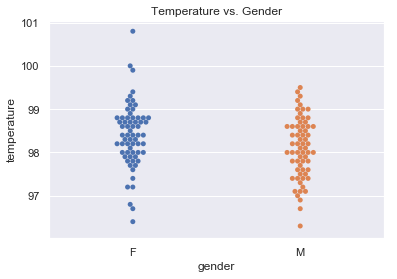

In [49]:
sns.set()
_ = sns.swarmplot(x = 'gender', y = temperature, data = df)
_ = plt.title('Temperature vs. Gender')
plt.show()

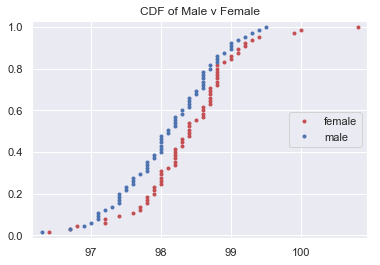

In [50]:
true_mean = np.mean(temperature)
female_df = df[df.gender == 'F'].temperature
male_df = df[df.gender == 'M'].temperature 

female_x, female_y = ecdf(female_df)
male_x, male_y = ecdf(male_df)
plt.plot(female_x, female_y, marker = '.', linestyle = 'none', label = 'female',
        color = 'r')
plt.plot(male_x, male_y, marker = '.', linestyle = 'none', label = 'male',
        color = 'b')
plt.margins(0.03)
plt.legend(loc = 'center right')
plt.title('CDF of Male v Female')
plt.show()

In [51]:
female_mean = np.mean(female_df)
male_mean = np.mean(male_df)

diff_means = female_mean - male_mean
print(diff_means)

diff_std_dev = np.sqrt((np.std(female_df)**2)/65 + (np.std(male_df)**2)/65)
print(diff_std_dev)

std_err = diff_std_dev * 1.96
min_diff, max_diff = (0 - std_err, 0 + std_err)
print(min_diff, max_diff)
std_err


0.2892307692307696
0.12557668521231213
-0.24613030301613179 0.24613030301613179


0.24613030301613179

In [120]:
def diff_of_means(data_1, data_2):
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample1 = permuted_data[:len(data1)]
    perm_sample2 = permuted_data[len(data1):]
    return perm_sample1, perm_sample2
   
def draw_perm_reps(data_1, data_2, func, size = 1):
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

np.random.seed(100)
empirical_diff = diff_of_means(female_df, male_df)
perm_reps = draw_perm_reps(female_df, male_df, diff_of_means, size = 10000)

p = np.sum(perm_reps >= empirical_diff)/len(perm_reps)
print('p =', p)


p = 0.0141


#### Answer 6
- H<sub>0</sub>: There is no significant difference between males and females, their means are equal. 
- H<sub>A</sub>: There is significant difference between males and females, their means are not equal. 

After 10,000 permutations, we reject the null hypothesis. There is a significant difference between the male and female temperatures.

Our null hypothesis states that there is no significant difference between female and male temperatures, therefore if we randomize our data while disregarding the gender variable, then compare the difference of means between the randomized samples to the difference of means between male and females we would expect a high probability of matches. But if we have a p value below alpha 0.05, we reject the null hypothesis, suggesting that the resulting difference of the means between females and males has a low probability of occuring and as a result is significant. 

The results show that it is not accurate claim with 100% certainty that the normal body temperature of the whole population is 98.6 F. From multiple hypothesis testing methods, is seems that with 95% confidence the average body temperature falls below the proposed normal temperature. 

We also have to take into consideration other variables which can contribute to the variation of temperatures. From our permutation testing, we found that there is a significant difference between the temperatures of males and females. 

Lastly, we have to question the gathering of the data points. A way to improve the test would be to place a control group to ensure no extraneaous variables could affect the results.
- Were all individuals healthy when gathering temperatures? 
- Items of clothing worn by each individual?
- Temperature of testing room? Or time of day? 

A way to avoid these extraneous factors would be to increase the sample size of individuals spread globally to our data so that our averages reach closer to the central limit theorem. 